### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：文字条件是否一致 因变量：说出列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

μ1：为总体均值，表示人们在文字条件一致时说出列表中的墨色名称的平均时间 μ2：为总体均值，表示人们在文字条件不一致时说出列表中的墨色名称的平均时间 

H0（零假设）：μ1 = μ2 ，既文字条件一致与不一致时说出列表中的墨色名称的平均时间相等
H0（对立假设）：μ1 ≠ μ2 ，既文字条件一致与不一致时说出列表中的墨色名称的平均时间不相等

选择配对样本t检验
总体标准差未知，数据是对同一受试对象接受两种不同的处理，比较两个平均数的差异是否显著。

选定显著性水平：0.05

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [3]:
#导入需要的包
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#导入数据并查看前几行
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [5]:
#了解数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [6]:
#描述性统计
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


描述性统计结果：

文字条件一致：平均值：14.05min 最大值：22.32min 最小值 8.63min 标准差 3.56min

文字条件不一致： 平均值：22.01min 最大值：35.25min 最小值 15.68min 标准差 4.80min

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

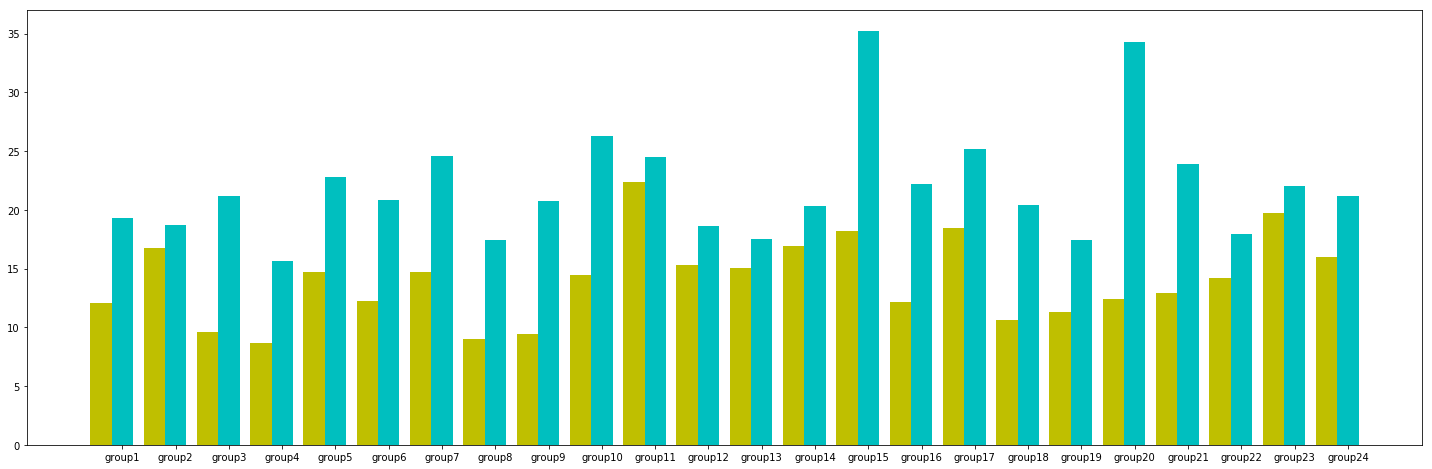

In [7]:
#参考https://blog.csdn.net/qq_29721419/article/details/71638912 Python——使用matplotlib绘制柱状图
plt.figure(figsize=(25,8))
name_list = ["group"+str(i) for i in list(range(1,25))] 
num_list1 = df['Congruent']
num_list2 = df['Incongruent']
x =list(range(len(num_list1)))  
total_width, n = 0.8, 2  
width = total_width / n  
plt.bar(x, num_list1, width=width, label='Congruent',fc = 'y');
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, num_list2, width=width, label='Incongruent',tick_label = name_list,fc = 'c');

通过柱状图可知，文字条件不一致时说出列表中的墨色名称的时间都大于相对应组文字条件一致时测得的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

我们取显著性水平（α）= 0.05 

自由度df = n-1 =23

选择的假设检验是双尾

据此我们查表得t临界值为2.069

In [8]:
#方法一使用Scipy函数库直接进行假设检验的计算：
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [9]:
#二，利用公式

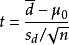
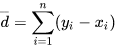
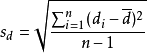
注：其中d-为配对样本差值之平均数，Sd为配对样本差值之标准偏差，n为配对样本数.yi为Incongruent列数据，xi为Congruent对应数据

得出t约为8.021。

由方法一计算出pvalue约为4,1e-08，远小于选定显著性水平0.05，且|t-statistic|8.021>=2.069(t临界值），并且查询t界值表，t统计量所对应的p值小于0.01，因此我们拒绝零假设。
因此我们可以得出文字条件不一致时说出列表中的墨色名称的时间的总体均值大于相对应组文字条件一致时测得的时间的总体均值。